# MNIST - Digit Classification

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras # keras is a wrapper on tensorflow

from sklearn.metrics import confusion_matrix, classification_report

mnist = pd.read_csv('MNIST_Train.csv')

mnist.shape

(42000, 785)

In [2]:
tf.__version__

'2.8.0'

In [3]:
# First we will try to build a plot and see the distribution of the data for different numbers 

In [4]:
mnist = mnist.iloc[ : , 1 : : ]

In [5]:
mnist.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mnist = np.array(mnist)

In [7]:
mnist.shape

(42000, 784)

In [8]:
var1 = mnist[58]

In [9]:
var1 = var1.reshape(28, 28) # we have taken 28*28 becuase our pixel is of 784px means 28*28 image

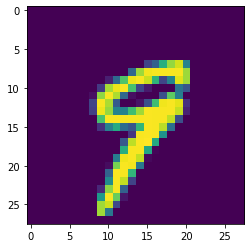

In [10]:
plt.imshow(var1)

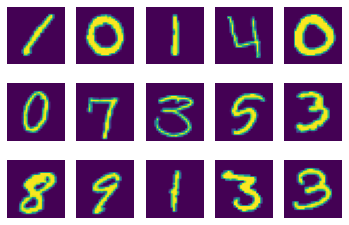

In [11]:
# Print multiple images at a time

for i in range(15):
    plt.subplot(3,5, i+1) # 3 and 5 should be the no. to give product 15
    plt.imshow(mnist[i, :].reshape(28, 28))
    plt.axis('off')

In [12]:
# Model building part starts

In [13]:
mnist = pd.read_csv('MNIST_Train.csv')

In [14]:
mnist_x = mnist.iloc[ : , 1::]
mnist_y = mnist.iloc[ : , 0]

In [15]:
from sklearn.model_selection import train_test_split

mnist_x_train, mnist_x_test, mnist_y_train, mnist_y_test = train_test_split(mnist_x, mnist_y, test_size=.2)

In [16]:
print(mnist_x_train.shape)
print(mnist_y_train.shape)

(33600, 784)
(33600,)


In [17]:
print(mnist_x_test.shape)
print(mnist_y_test.shape)

(8400, 784)
(8400,)


In [18]:
# make the data unitless and fall under 0 to 1

# this step is not mandatory, but if you normalize it you get better performance

mnist_x_train = tf.keras.utils.normalize(mnist_x_train)
mnist_x_test = tf.keras.utils.normalize(mnist_x_test)

# To check the change

# list(mnist_x_train.iloc[0, 1 ::])

In [19]:
# In Neural network your data has to be in the ARRAY format and not in the data frame format

mnist_x_train = np.array(mnist_x_train)
mnist_x_test = np.array(mnist_x_test)
mnist_y_train = np.array(mnist_y_train)

In [20]:
model = tf.keras.models.Sequential() # modelis initialized
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu)) # 1st Hidden Layer
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu)) # 2st Hidden Layer
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu)) # 3st Hidden Layer
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax)) # 10 is not a hyper parameter
# number of layers in target variable

In [21]:
# 'adam' optimizer (like the GD)

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
model1 = model.fit(mnist_x_train, mnist_y_train, epochs=50, validation_split=.2, batch_size = 64)

Epoch 1/50
420/420 [==============================] - 2s 3ms/step - loss: 0.5399 - accuracy: 0.8430 - val_loss: 0.2730 - val_accuracy: 0.9202
Epoch 2/50
420/420 [==============================] - 1s 2ms/step - loss: 0.2179 - accuracy: 0.9322 - val_loss: 0.1906 - val_accuracy: 0.9396
Epoch 3/50
420/420 [==============================] - 1s 2ms/step - loss: 0.1559 - accuracy: 0.9520 - val_loss: 0.1723 - val_accuracy: 0.9494
Epoch 4/50
420/420 [==============================] - 1s 2ms/step - loss: 0.1198 - accuracy: 0.9636 - val_loss: 0.1417 - val_accuracy: 0.9560
Epoch 5/50
420/420 [==============================] - 1s 2ms/step - loss: 0.0959 - accuracy: 0.9697 - val_loss: 0.1352 - val_accuracy: 0.9597
Epoch 6/50
420/420 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9757 - val_loss: 0.1309 - val_accuracy: 0.9610
Epoch 7/50
420/420 [==============================] - 1s 2ms/step - loss: 0.0601 - accuracy: 0.9812 - val_loss: 0.1332 - val_accuracy: 0.9618
Epoch 

In [23]:
# We cannot use the the predict function directly beucase it gives us the probabality of the function 
y_pred = model.predict(mnist_x_test)
y_pred = np.argmax(y_pred, axis =1)
y_pred

array([1, 2, 7, ..., 1, 6, 2], dtype=int64)

In [24]:
model1.history

model1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
dict1 = pd.DataFrame(model1.history)
dict1.head()

,loss,accuracy,val_loss,val_accuracy
0,0.539858,0.842969,0.272953,0.920238
1,0.217913,0.932217,0.190583,0.939583
2,0.155915,0.952046,0.172260,0.949405
3,0.119781,0.963579,0.141673,0.955952
4,0.095904,0.969717,0.135154,0.959673


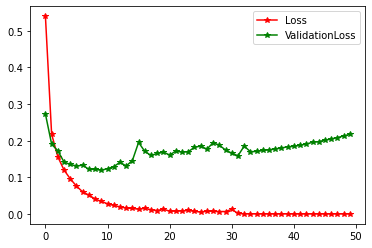

In [26]:
plt.plot(dict1.loss, color = 'r', label = 'Loss', marker = '*')
plt.plot(dict1.val_loss, color = 'g', label = 'ValidationLoss', marker = '*')
plt.legend()

In [28]:

tab = confusion_matrix(mnist_y_test, y_pred)
print('Confusion Matrix : \n Actual Values -> Predicted Values\n \n',tab)
print('\n',classification_report(mnist_y_test, y_pred))

Confusion Matrix : 
 Actual Values -> Predicted Values
 
 [[828   0   3   1   1   2   4   1   1   0]
 [  0 933   2   2   0   0   1   0   0   0]
 [  2   1 829   2   3   2   1   3   6   0]
 [  0   1   6 841   0   7   0   7   4   1]
 [  0   2   0   0 802   2   2   3   0  12]
 [  0   0   3   6   0 751   4   0   4   4]
 [  7   2   1   0   2   0 817   0   3   0]
 [  2   0   6   2   0   0   0 825   2   6]
 [  1   3   5   4   0   1   3   1 793   5]
 [  7   0   0   2  10   4   0   4   5 787]]

               precision    recall  f1-score   support

           0       0.98      0.98      0.98       841
           1       0.99      0.99      0.99       938
           2       0.97      0.98      0.97       849
           3       0.98      0.97      0.97       867
           4       0.98      0.97      0.98       823
           5       0.98      0.97      0.97       772
           6       0.98      0.98      0.98       832
           7       0.98      0.98      0.98       843
           8       0.9

<h3>Conclusion : </h3>We have managed to achieve a <b>Precision : 98% and Accuracy : 98%</b>